# 한글 폰트

In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '../나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

# 라이브러리 추가

In [2]:
from bs4 import BeautifulSoup
import requests
from lxml import html
import pandas as pd

# 페이지 크롤링
https://bigdata.seoul.go.kr/noti/selectPageListTabNoti.do?r_id=P260&bbs_seq=&ac_type=A1

In [3]:
# 빈 데이터프레임 생성(제목 저장)
df = pd.DataFrame(columns = ['Title'])

# 1에서 10까지의 페이지에 대한 반복문
for page_number in range(1, 11):
    url = f"https://bigdata.seoul.go.kr/noti/selectPageListTabNoti.do?r_id=P260&bbs_seq=&ac_type=A1&sch_type=&sch_text=&currentPage={page_number}"
    response = requests.get(url)
    
    tree = html.fromstring(response.text)

    # XPath를 사용하여 모든 게시물 제목 선택
    page_post_titles = tree.xpath('//*[@id="aform"]/div[1]/div/table/tbody/tr/td[2]/a/@title')

    # df 에 저장
    df = pd.concat([df, pd.DataFrame({'Title':page_post_titles})], ignore_index = True)

df

,Title
0,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안 [2022 빅데이터캠퍼스...
1,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색 [2022 빅데이터캠퍼스...
2,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정 [2022 빅데이터캠...
3,서울시 차 없는 거리 효과 분석과 우선 입지 선정 [2022 빅데이터캠퍼스 공모전 ...
4,환경형평성을 고려한 서울시 내 그린 인프라 조성 [2022 빅데이터캠퍼스 공모전 -...
...,...
93,지하철 역 추가 설치 제안 - 소득수준의 관점에서 [2017 빅캠 상시공모전]
94,서울시 자전거 이동경로 데이터 분석 [2017 빅캠 상시공모전]
95,빅데이터 분석을 통한 서울시 숙박업소 실태와 관광활성화 방안 [2017 빅캠 상시공...
96,서울시 미세먼지 데이터를 활용한 분석 기획:유소년 보행 환경 개선에 대한 시나리오 ...


# 정규표현식을 이용한 텍스트 분리

In [4]:
df['Main_Title'] = df['Title'].str.split('[').str[0].str.strip()

#  '[' 다음에 연속된 숫자를 추출
df['Year'] = df['Title'].str.extract(r'\[([\d]+)')

# '-'와 ']' 사이의 모든 문자열을 추출
df['Award'] = df['Title'].str.extract(r' - ([^\]]+)')

df.head()

,Title,Main_Title,Year,Award
0,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안 [2022 빅데이터캠퍼스...,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안,2022,서울창조경제혁신센터장상 수상
1,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색 [2022 빅데이터캠퍼스...,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색,2022,최우수상
2,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정 [2022 빅데이터캠...,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정,2022,최우수상
3,서울시 차 없는 거리 효과 분석과 우선 입지 선정 [2022 빅데이터캠퍼스 공모전 ...,서울시 차 없는 거리 효과 분석과 우선 입지 선정,2022,우수상
4,환경형평성을 고려한 서울시 내 그린 인프라 조성 [2022 빅데이터캠퍼스 공모전 -...,환경형평성을 고려한 서울시 내 그린 인프라 조성,2022,우수상


# 타이틀 데이터를 분리했으니 지워주고, 수상 목록을 저장

In [5]:
df.drop('Title', axis = 1, inplace = True)
df.to_csv('BigdataContest_Award_list.csv', index = False, encoding = 'utf-8 sig')
df

,Main_Title,Year,Award
0,지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안,2022,서울창조경제혁신센터장상 수상
1,도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색,2022,최우수상
2,탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정,2022,최우수상
3,서울시 차 없는 거리 효과 분석과 우선 입지 선정,2022,우수상
4,환경형평성을 고려한 서울시 내 그린 인프라 조성,2022,우수상
...,...,...,...
93,지하철 역 추가 설치 제안 - 소득수준의 관점에서,2017,소득수준의 관점에서 [2017 빅캠 상시공모전
94,서울시 자전거 이동경로 데이터 분석,2017,NaN
95,빅데이터 분석을 통한 서울시 숙박업소 실태와 관광활성화 방안,2017,NaN
96,서울시 미세먼지 데이터를 활용한 분석 기획:유소년 보행 환경 개선에 대한 시나리오,2017,NaN


# 워드 클라우드 준비를 위하여 텍스트 합치기

In [6]:
# 선택된 열의 각 행(row)에 있는 데이터를 공백으로 구분하여 하나의 큰 문자열로 결합
text = ' '.join(df['Main_Title'])
text[:200]

'지하철 9호선 신설역 수요인원 예측모델 개발 및 정책 제안 도시데이터 센서 환경정보 기반의 금천구 폭염 취약지역 탐색 탄소중립 선도를 위한 서울시 종합에너지스테이션 우선 입지 선정 서울시 차 없는 거리 효과 분석과 우선 입지 선정 환경형평성을 고려한 서울시 내 그린 인프라 조성 서울시 제로마켓(리필스테이션) 신규 개설 입지 선정 서울시 공공심야약국 최적입지'

In [7]:
!pip install wordcloud

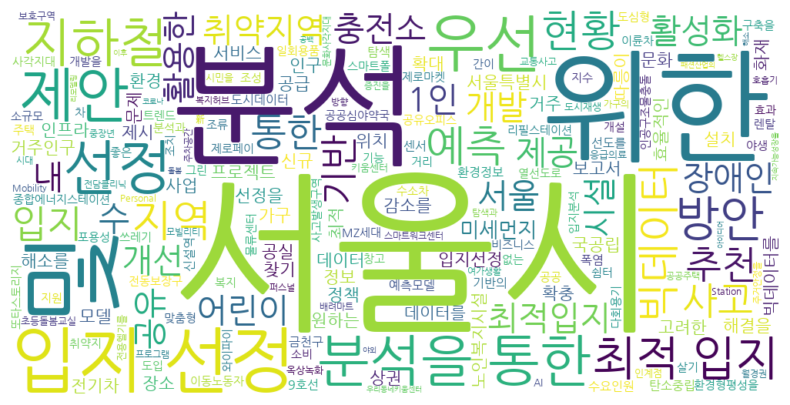

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud 객체 생성
wordcloud = WordCloud(width=1000, height=500, background_color='white', font_path = font_path).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

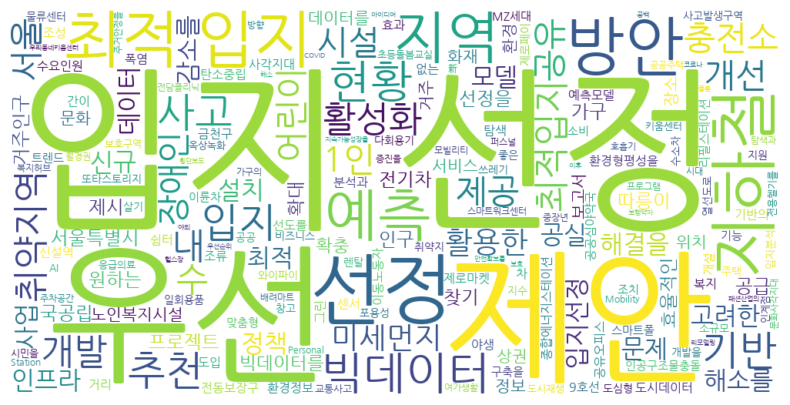

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 무시할 단어 리스트
stopwords = ["서울시", "분석", "분석을", "및", "위한", "통한"]

# WordCloud 객체 생성
wordcloud = WordCloud(width=1000, height=500, background_color='white', font_path=font_path, stopwords=stopwords).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
